# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [1]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [2]:
A

array([[  1, 100],
       [  2,  10],
       [  3,   0]])

In [3]:
A @ np.array([2, 0]).reshape(-1,1)

array([[2],
       [4],
       [6]])

In [4]:
A @ np.array([-1, 1]).reshape(-1,1)

array([[99],
       [ 8],
       [-3]])

In [5]:
A @ np.array([0, 0]).reshape(-1,1)

array([[0],
       [0],
       [0]])

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [6]:
# in the column space of B: a, c, e
# not in the column space: b, d
c = np.array([-1,1]).reshape(-1,1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [7]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [4,4,1],
])
y = np.array([7,5,5,5.5]).reshape(-1,1)

#c = np.linalg.solve(X, y)
#c

The system is solveable mathematically if y is in the column space of X.

np.linalg.solve can do it if is both mathematically possible and X is square.

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [8]:
c = np.linalg.solve(X.T@X, X.T@y)
c

array([[0.375],
       [0.125],
       [3.25 ]])

In [9]:
X @ c

array([[7.  ],
       [5.  ],
       [5.25],
       [5.25]])

# Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

## Fruit Sales Example

In [10]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [11]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [12]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

## Scatter Example

In [13]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,6.486749,13.632088
1,6.876069,12.139412
2,2.903181,6.782462
3,5.668241,10.642197
4,2.939705,5.185055
5,9.125357,18.660454
6,3.364872,5.357871
7,3.865027,9.452862
8,4.961488,10.032396
9,5.237388,10.143625


<AxesSubplot:xlabel='x', ylabel='y'>

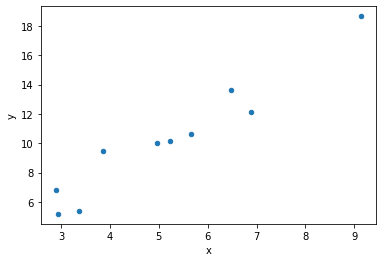

In [14]:
df.plot.scatter(x="x", y="y")

In [15]:
X = df[["x"]].values
y = df[["y"]].values
y

array([[13.63208761],
       [12.13941249],
       [ 6.78246243],
       [10.64219698],
       [ 5.18505462],
       [18.66045417],
       [ 5.35787098],
       [ 9.45286158],
       [10.03239643],
       [10.14362468]])

In [16]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.14019565, 0.14860987, 0.06274535, 0.12250555, 0.06353473,
        0.19722289, 0.07272371, 0.08353337, 0.10723077, 0.1131937 ],
       [0.14860987, 0.1575291 , 0.06651118, 0.12985806, 0.06734794,
        0.20905977, 0.07708843, 0.08854685, 0.11366652, 0.11998733],
       [0.06274535, 0.06651118, 0.02808203, 0.05482805, 0.02843532,
        0.08826821, 0.03254791, 0.03738583, 0.04799173, 0.05066047],
       [0.12250555, 0.12985806, 0.05482805, 0.10704762, 0.05551782,
        0.17233701, 0.06354733, 0.072993  , 0.09370023, 0.09891075],
       [0.06353473, 0.06734794, 0.02843532, 0.05551782, 0.02879306,
        0.08937869, 0.03295738, 0.03785617, 0.0485955 , 0.05129782],
       [0.19722289, 0.20905977, 0.08826821, 0.17233701, 0.08937869,
        0.27744706, 0.10230547, 0.11751216, 0.15084892, 0.15923738],
       [0.07272371, 0.07708843, 0.03254791, 0.06354733, 0.03295738,
        0.10230547, 0.03772398, 0.04333128, 0.05562384, 0.05871699],
       [0.08353337, 0.08854685, 0.0373858

In [17]:
p = P@y
p

array([[12.85744153],
       [13.62911612],
       [ 5.75442009],
       [11.23507026],
       [ 5.82681481],
       [18.08745032],
       [ 6.66954294],
       [ 7.66090404],
       [ 9.83420936],
       [10.38107348]])

In [18]:
df["p"] = p
df

,x,y,p
0,6.486749,13.632088,12.857442
1,6.876069,12.139412,13.629116
2,2.903181,6.782462,5.754420
3,5.668241,10.642197,11.235070
4,2.939705,5.185055,5.826815
5,9.125357,18.660454,18.087450
6,3.364872,5.357871,6.669543
7,3.865027,9.452862,7.660904
8,4.961488,10.032396,9.834209
9,5.237388,10.143625,10.381073


In [19]:
df["p"] / df["x"]

0    1.982109
1    1.982109
2    1.982109
3    1.982109
4    1.982109
5    1.982109
6    1.982109
7    1.982109
8    1.982109
9    1.982109
dtype: float64

<AxesSubplot:xlabel='x', ylabel='p'>

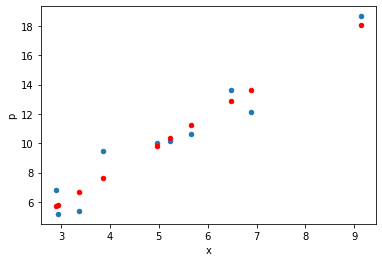

In [20]:
ax = df.plot.scatter(x="x", y="y")
df.plot.scatter(x="x", y="p", ax=ax, color="red")

# Euclidean Distance Between Columns

In [21]:
df2 = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
df2

,v1,v2
x,1,4
y,8,12


In [22]:
((df2["v2"] - df2["v1"]) ** 2).sum() ** 0.5

5.0

In [26]:
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.161504066577767

In [24]:
df.head()

,x,y,p
0,6.486749,13.632088,12.857442
1,6.876069,12.139412,13.629116
2,2.903181,6.782462,5.754420
3,5.668241,10.642197,11.235070
4,2.939705,5.185055,5.826815
